In [142]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import copy

file_name = 'test_z_mask_01.pam'
data_dir = 'data'

file_path = os.path.join(data_dir, file_name)

with open(file_path, 'rb') as fle:
    file_bytes = fle.read()

print(file_bytes[:25])

b''


In [117]:
byteorder = 'little'
idx = 0
name_length = file_bytes[idx]

idx = 1
mask_name = file_bytes[idx:(idx+name_length)].decode('utf-8')
print(mask_name)

idx += name_length
num_shape_bytes = 4
start_idxs = [idx + (x * num_shape_bytes) for x in range(3)]
mask_shape = tuple(int.from_bytes(file_bytes[i:(i + num_shape_bytes)], 
                                  byteorder=byteorder)
                   for i in start_idxs) 

idx += num_shape_bytes * 3
mask_data = file_bytes[idx:]

test_z_mask_corban_1


In [118]:
mask_data_np = np.array([intval for intval in mask_data])
original_size = mask_data_np.size


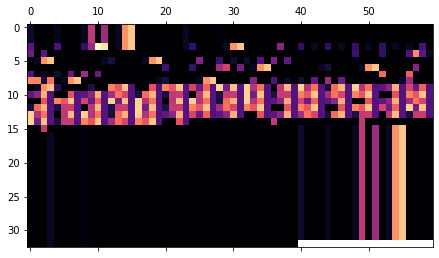

In [119]:
vis_width = 60
new_shape = (np.ceil(mask_data_np.size / vis_width).astype(int), width)
mask_data_vis = np.resize(mask_data_np.astype(float), new_shape)

num_extra_values = mask_data_vis.size - original_size
extra_value_idxs = mask_data_vis.size - (np.arange(num_extra_values) + 1)
extra_value_slice = np.unravel_index(extra_value_idxs, mask_data_vis.shape)
mask_data_vis[extra_value_slice] = np.NaN

plt.matshow(mask_data_vis, cmap='magma')

In [120]:
chunk_idxs = -33 + np.concatenate((np.arange(33, 213 + 60, 60), 
                                    [321, 413, 505, ],
                                    np.arange(973, 1933 + 60, 60)))
chunk_sizes = np.diff(chunk_idxs, append=mask_data_np.size)
print(chunk_idxs)
print(chunk_idxs.shape)
print(chunk_sizes - 8 - 32)

[   0   60  120  180  288  380  472  940 1000 1060 1120 1180 1240 1300
 1360 1420 1480 1540 1600 1660 1720 1780 1840 1900]
(24,)
[ 20  20  20  68  52  52 428  20  20  20  20  20  20  20  20  20  20  20
  20  20  20  20  20  20]


In [121]:
split_mask_data_np = np.split(mask_data_np, chunk_idxs[1:])
split_mask_data_bytes = [bytes(x.tolist()) for x in split_mask_data_np]
split_mask_data_obj = [{
    'head': [int.from_bytes(x[:4], byteorder=byteorder), 
             int.from_bytes(x[4:8], byteorder=byteorder)], 
    'data': x[8:-32],
    'tail': x[-32:]} for x in split_mask_data_bytes]

print(split_mask_data_obj[0])

{'head': [20, 12], 'data': b'\x0e\x81\x00l\x01\x10\xc0\xdb\x00\x00\x00\x00\x02\x00\x00\x10\x00\x00\x00\x00', 'tail': b'\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'}


In [123]:
for i, x in enumerate(split_mask_data_obj):
    _file_name = 'test_01_page-%02d_data.bin' % (i + 1)
    _file_path = os.path.join(data_dir, _file_name)
    with open(_file_path, 'wb') as fle:
        fle.write(x['data'])

In [124]:
_ = [print([xx for xx in x['data']]) for x in split_mask_data_obj]

[14, 129, 0, 108, 1, 16, 192, 219, 0, 0, 0, 0, 2, 0, 0, 16, 0, 0, 0, 0]
[14, 129, 0, 108, 1, 16, 192, 219, 0, 0, 0, 0, 2, 0, 0, 16, 0, 0, 0, 0]
[14, 129, 0, 108, 1, 16, 192, 219, 0, 0, 0, 0, 2, 0, 0, 16, 0, 0, 0, 0]
[45, 106, 249, 236, 1, 16, 192, 219, 0, 0, 0, 0, 1, 0, 0, 16, 44, 0, 0, 0, 1, 16, 192, 219, 6, 0, 0, 0, 0, 96, 0, 0, 43, 0, 16, 0, 43, 0, 16, 0, 43, 0, 15, 0, 43, 0, 15, 0, 13, 0, 58, 0, 81, 0, 69, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[62, 189, 71, 18, 1, 16, 192, 219, 0, 0, 0, 0, 1, 0, 0, 16, 28, 0, 0, 0, 1, 16, 192, 219, 3, 0, 0, 0, 0, 96, 0, 0, 50, 0, 21, 0, 20, 0, 66, 0, 88, 0, 73, 0, 0, 1, 1, 0, 0, 0, 0, 0]
[112, 142, 2, 83, 1, 16, 192, 219, 0, 0, 0, 0, 1, 0, 0, 16, 28, 0, 0, 0, 1, 16, 192, 219, 3, 0, 0, 0, 0, 96, 0, 0, 63, 0, 18, 0, 24, 0, 73, 0, 109, 0, 78, 0, 0, 1, 1, 0, 0, 0, 0, 0]
[186, 186, 28, 176, 1, 16, 192, 219, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 16, 28, 0, 0, 0, 1, 16, 192, 219, 3, 0, 0, 0, 0, 96, 0, 0, 63, 0, 18, 0, 24, 0, 73, 0, 109, 0, 78, 0, 0, 1, 1, 0, 

In [290]:
def bytes_to_int_arr(byts):
    return [b for b in byts]


def pop_byte(byte_arr):
    return byte_arr.pop(0)


def pop_bytes(byte_arr, length):
    return bytes([pop_byte(byte_arr) for _ in range(length)])


def pop_uint8(byte_arr):
    return pop_byte(byte_arr)


def pop_uint32(byte_arr, byteorder='little'):
    byts = pop_bytes(byte_arr, 4)
    return int.from_bytes(byts, byteorder)
    
    
def pop_string(byte_arr, length, encoding='utf-8'):
    byts = pop_bytes(byte_arr, length)
    return byts.decode(encoding)
    
        
def indent(string):
    indent_str = ' ' * 3
    return indent_str + (('\n' + indent_str).join(string.splitlines()))
      
    
class PhotoactivationMaskSlice:
    
    def __init__(self, header=None, footer=None, data=None):
        self.header = header
        self.data = data if data is None else bytes(data)
        self.footer = footer if footer is None else bytes(footer)

    def __repr__(self):
        repr_str = '''{:s}(
   header={},
   footer={},
   data={})'''.format(
            self.__class__.__name__,
            self.header,
            bytes_to_int_arr(self.footer),
            bytes_to_int_arr(self.data))
        return repr_str

        
class PhotoactivationMask:
    
    def __init__(self, name=None, shape=None, slices=None,):
        self.shape = shape
        self.slices = list() if slices is None else slices
        self.name = str() if name is None else name

    def __repr__(self):
        repr_str = '''{:s}(
   name=\'{:s}\',
   shape={},
   slices=[{:s}])'''.format(
            self.__class__.__name__,
            self.name, 
            self.shape, 
            '' if not self.slices else ('\n' + 
            indent(',\n'.join(indent(repr(sl)) for sl in self.slices))))
        return repr_str
        
    @staticmethod
    def build_from_binary(byts):
        byts = bytearray(byts)
        pam = PhotoactivationMask()
        
        name_length = pop_uint8(byts)
        pam.name = pop_string(byts, name_length)
        
        pam.shape = tuple(pop_uint32(byts) for _ in range(3))
        
        slice_footer_length = 32        
        while byts:            
            pam_slice = PhotoactivationMaskSlice()
            slice_data_length = pop_uint32(byts)
            pam_slice.header = (slice_data_length, pop_uint32(byts))
            pam_slice.data = pop_bytes(byts, slice_data_length)
            pam_slice.footer = pop_bytes(byts, slice_footer_length)
            pam.slices.append(pam_slice)
        
        assert len(pam.slices) == pam.shape[2]
        
        return pam
    
    @staticmethod
    def build_from_file(path):
        with open(path, 'rb') as fle:
            byts = fle.read()
        return PhotoactivationMask.build_from_binary(byts)
    
PhotoactivationMask()

PhotoactivationMask(
   name='',
   shape=None,
   slices=[])

In [291]:
pam = PhotoactivationMask.build_from_file(file_path)
pam

PhotoactivationMask(
   name='test_z_mask_corban_1',
   shape=(128, 128, 24),
   slices=[
      PhotoactivationMaskSlice(
         header=(20, 12),
         footer=[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         data=[14, 129, 0, 108, 1, 16, 192, 219, 0, 0, 0, 0, 2, 0, 0, 16, 0, 0, 0, 0]),
      PhotoactivationMaskSlice(
         header=(20, 12),
         footer=[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         data=[14, 129, 0, 108, 1, 16, 192, 219, 0, 0, 0, 0, 2, 0, 0, 16, 0, 0, 0, 0]),
      PhotoactivationMaskSlice(
         header=(20, 12),
         footer=[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         data=[14, 129, 0, 108, 1, 16, 192, 219, 0, 0, 0, 0, 2, 0, 0, 16, 0, 0, 0, 0]),
      PhotoactivationMaskSlice(
         header=(68, 60),
         footer=[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0